In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

### 1. 

You are required to optimize the booth function using gradient descent. The Code below provides a visual representation of the booth function in a 3D plot. Mathematically, the function can be defined as follows.

$$f(x,y) = (x+2y)^2 + (2x+y-5)^2$$

Your tasks are to:
- Add proper axis/figure labels to the 3d plot provided.
- Derive the partial gradients.
- Create a function to perform Gradient Descent on the given equation, the function should take the initial values of $(x,y)$ and $\alpha$ as inputs. Initial value of (x,y) would be (-10,5) and the steplength $\alpha$ needs to be determined through trial and error. Once the $\alpha$ is finalized, plot the value of $Z$ over time as it is minimized using the gradient descent.
- Visualize the trajectory on a 3D plot. This trajectory should ideally lead to the function minimum. Try to plot the trajectory in a for loop so that the path taken is visible.

The GD algorithm is given below, where $\epsilon$ is a small float value like $10^{-3}$ or $10^{-5}$ and $i_{max}$ is the max number of iterations to perform. 

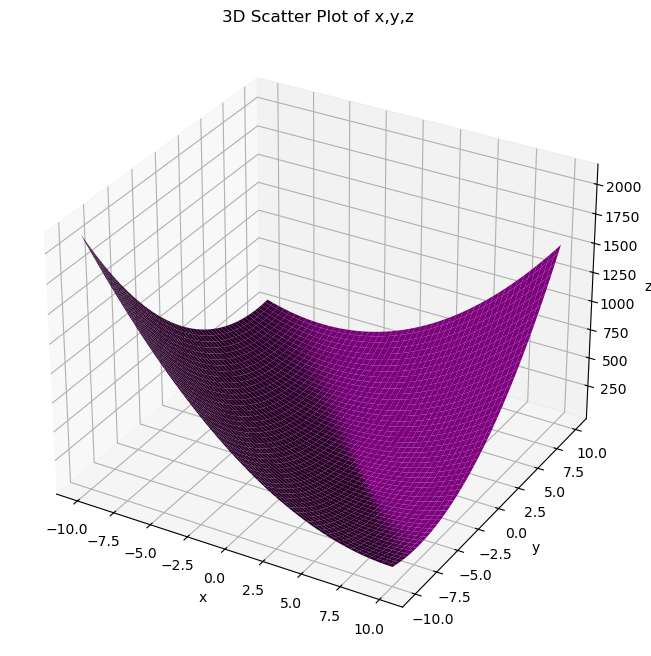

In [3]:

# Define the function
def f(x, y):
    return (x + 2 * y) ** 2 + (2 * x + y - 5) ** 2

# Generate a grid of x and y values
x_range = np.linspace(-10, 10, 200)  
y_range = np.linspace(-10, 10, 200)
x, y = np.meshgrid(x_range, y_range)  # Creates 2D arrays for x and y

z = f(x, y)  # Apply the function to the entire grid

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(x, y, z, color='purple')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Scatter Plot of x,y,z')

plt.show()


#### b. 

In [4]:
# Booth function definition
def booth_function(x, y):
    return (x + 2 * y) ** 2 + (2 * x + y - 5) ** 2

# Partial derivatives
def booth_gradient(x, y):
    df_dx = 5 * x + 4 * y - 10  # Partial Derivative with respect to x
    df_dy = 4 * x + 4 * y - 5   # Partial Derivative with respect to y
    return np.array([df_dx, df_dy])

# Gradient descent algorithm
def gradient_descent(learning_rate=0.01, epochs=10):
    beta = np.array([0, 0])
  
    for _ in range(epochs):
        grad = booth_gradient(beta[0], beta[1])
        beta = beta - learning_rate * grad
        #print(path)
    
      #  points.append(point)
    return (beta)

gradient_descent()


array([0.74624509, 0.28396592])

In [5]:
##another
### write your code here

#function f(x,y)
def booth(x,y):
    return (x+2*y)**2+(2*x+y-5)**2

#partial derivative wrt x 
def derv_fx(x,y):
    return 2*(x+2*y) +2*(2*x+y-5)*2

#partial derivative wrt y
def derv_fy(x,y):
    return 2*(x+2*y)*2+2*(2*x+y-5)

def gradient_decent_booth(x,y,alpha):
    iterations = 0 ## for calculating number of iterations
    step_x = 1 ## arbitrary step length to start the loop for x
    step_y = 1 ## arbitrary step length to start the loop for y
    max_iter = 100 ## maximum iterations
    z_val = [booth(x,y)] #Tos tore the Z value/booth value as we optimize the function
    x_val = [x]
    y_val = [y]
    while (np.abs(step_x) > 1e-6) or (np.abs(step_y) > 1e-6): #iterate untill the value of function stops changing below 1e-6 

        #to stop our optimization if the function stops converging after certain number of iterations
        if iterations > max_iter:
            break

        ## for calculating steps wrt both x and y
        step_x = -lr*derv_fx(x,y)
        step_y = -lr*derv_fy(x,y)

        ## for minimizing x,y
        x = x + step_x
        y = y + step_y

        ## increment the iteration
        iterations += 1
        x_val.append(x)
        y_val.append(y)
        z_val.append(booth(x,y))

    return x,y,iterations,z_val,(x_val,y_val)

minimum = np.inf
for n in range(10): #number of trials and error steps
    x = -10 #given x value
    y = 5 #give y value
    lrs = [0.01,0.1,0.2,0.5] #bunch of practical random learning rates
    lr = lrs[np.random.randint(0,4,1)[0]] #pick a random lr from our given list of lr

    x, y, iterations, z, _ = gradient_decent_booth(x,y,lr) #gradient descent step
    new_f = z[-1] #new value of f with optimized x, y
    if new_f < minimum: #store the value of x,y which minimize the function most
        minimum = new_f
        best_alpha = lr
        optimized_x, optimized_y = x , y
        it = iterations
        z_val = z



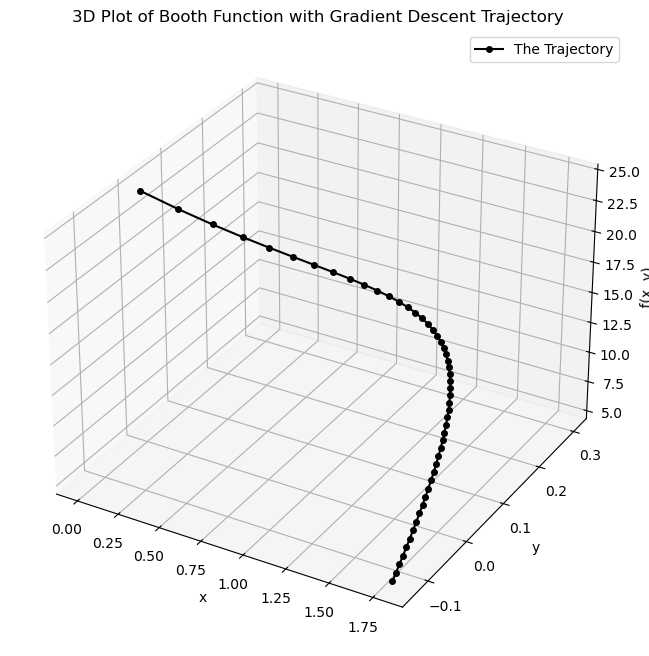

In [6]:
# Booth function definition
def booth_function(x, y):
    return (x + 2 * y) ** 2 + (2 * x + y - 5) ** 2

# Partial derivatives (gradient) of the Booth function
def booth_gradient(x, y):
    df_dx = 5 * x + 4 * y - 10  # Partial Derivative with respect to x
    df_dy = 4 * x + 4 * y - 5   # Partial Derivative with respect to y
    return np.array([df_dx, df_dy])

def gradient_descent(learning_rate=0.01, epochs=50):
    beta = np.array([0.0, 0.0])  # Starting point
    trajectory = [beta.copy()]  # List to store each point in the trajectory
  
    for _ in range(epochs):
        grad = booth_gradient(beta[0], beta[1])
        beta = beta - learning_rate * grad
        trajectory.append(beta.copy())  # Save current position in the trajectory

    return np.array(trajectory)

trajectory = gradient_descent()

# Plotting the Booth function with the trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting the x, y, and z values from the trajectory
traj_x = trajectory[:, 0]
traj_y = trajectory[:, 1]
traj_z = booth_function(traj_x, traj_y)

# Plot the trajectory on the 3D surface
ax.plot(traj_x, traj_y, traj_z, 'o-', color='black', markersize=4, label="The Trajectory")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of Booth Function with Gradient Descent Trajectory')

plt.legend()
plt.show()


### Step Length Function

In [286]:
def prediction(x, beta):
    z = np.dot(x, beta)
    return z  

def mean_square_loss(x, y, beta):
    predictions = np.dot(x, beta)
    return np.mean((y - predictions) ** 2)

def steplength(x, y, beta, lr, plus=1.1, minus=0.5, iterations=250):
    
    y_hat = prediction(x, beta)  # Initial prediction
    l_old = mean_square_loss(x, y, beta)  # Initial loss
    
    for i in range(iterations):
        # Calculate the gradient
        grad_beta = -2 * np.dot(x.T, (y - y_hat)) / len(y)
        
        # Update beta
        beta += lr * grad_beta
        
        # Calculate new prediction and loss
        y_hat = prediction(x, beta)
        l = mean_square_loss(x, y, beta)
        
        # Adjust learning rate based on loss 
        if l < l_old:
            lr *= plus
        else:
            lr *= minus
            return lr  # Return early if the loss increases
        
        # Update the previous loss
        l_old = l

    return lr


In [ ]:
#adjusted step length 

def step_length_control(x, y, beta, lr, plus=1.1, minus=0.5, iterations=250):

    y_hat = prediction(x, beta)  # Initial prediction
    l_old = mean_square_loss(x, y, beta)  # Initial loss

    for i in range(iterations):
        # Calculate the gradient
        grad_beta = -2 * np.dot(x.T, (y - y_hat)) / len(y)
        
        # Update beta tentatively
        beta_temp = beta + lr * grad_beta
        
        # Calculate new prediction and tentative loss
        y_hat_temp = prediction(x, beta_temp)
        l = mean_square_loss(x, y, beta_temp)
        
        # Adjust learning rate based on loss comparison
        if l < l_old:
            # Loss decreased, so we can increase learning rate
            lr *= plus
            beta = beta_temp  # Update beta since the loss improved
            y_hat = y_hat_temp  # Update y_hat to new prediction
            l_old = l  # Update old loss to new loss
        else:
            # Loss increased, reduce learning rate and do not update beta
            lr *= minus
        
        if iterations == 250:
            break
    
    return lr


### 2. LOGISTIC REGRESSION

#### a.)

In [71]:
class Optimization:
    def __init__(self,x,y):
        self.x = x  # Variables
        self.y = y  

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x,theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient_b = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient_b

    def mean_square_hessian(self, theta):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def newtons_method(self,theta,lr=0.01, epochs=50):
        
      #  theta = np.zeros(x.shape[1])  # Initial values for β

        for epoch in range(epochs):
            # Compute gradients
            gradient_b = self.mean_square_gradient(theta)

            # Compute Hessian matrix
            H_b = self.mean_square_hessian(theta)

            # Update parameters using Newton's method
            inv_hessian = np.linalg.inv(H_b)
            theta -= lr * np.dot(inv_hessian, gradient_b)
            
            # Compute Mean Square Loss
           # loss = self.mean_square_loss(theta)
            return(theta)

            #print(f"Epoch {epoch + 1}, Mean Square Loss: {loss}")

if __name__ == "__main__":
    
    x = np.random.rand(100, 3)
    y = np.random.rand(100) 

    model = Optimization(x,y)
    
    theta = np.zeros(x.shape[1])
    optimal_theta = model.newtons_method(theta)
    print("Optimal theta:", optimal_theta)
    


Optimal theta: [0.00377951 0.00320711 0.00330593]


In [288]:

class Loss:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x, theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient

    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    def cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        return gradient

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y):
        self.x = x  # Variables
        self.y = y
        self.loss_obj = Loss(x, y)

    def mean_square_hessian(self):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def newtons_method(self, theta, lr=0.01, epochs=30, loss_type="mse"):
      
        for epoch in range(epochs):
            if loss_type == "mse":
                gradient = self.loss_obj.mean_square_gradient(theta)
                hessian = self.mean_square_hessian()
            elif loss_type == "cross_entropy":
                gradient = self.loss_obj.cross_entropy_gradient(theta)
                hessian = self.mean_square_hessian() 

            inv_hessian = np.linalg.inv(hessian)
            theta -= lr * np.dot(inv_hessian, gradient)

            if loss_type == "mse":
                loss = self.loss_obj.mean_square_loss(theta)
            elif loss_type == "cross_entropy":
                loss = self.loss_obj.cross_entropy_loss(theta)
            #print(f"Epoch {epoch + 1}, Loss ({loss_type}): {loss}")

        return theta

if __name__ == "__main__":
    x = np.random.rand(100, 3)
    y = np.random.rand(100)  

    model = Optimization(x, y)
    # Initial theta (parameters)
    theta = np.zeros(x.shape[1])

    print("Mean Square Loss:")
    optimal_theta_mse = model.newtons_method(theta, loss_type="mse")
    print("Optimal theta for MSE after 30 iterations:", optimal_theta_mse)

    # Run Newton's Method for Cross Entropy Loss

    y_binary = np.random.randint(0, 2, size=100)
    model_ce = Optimization(x, y_binary)

    print("\Cross Entropy Loss:")
    optimal_theta_ce = model_ce.newtons_method(theta, loss_type="cross_entropy")
    print("Optimal theta for Cross Entropy after 30 iterations:", optimal_theta_ce)


Mean Square Loss:
Optimal theta for MSE after 30 iterations: [0.0598615  0.08457299 0.08766653]
\Cross Entropy Loss:
Optimal theta for Cross Entropy after 30 iterations: [0.07106551 0.07236868 0.09858609]


### b.) Mean Squared Loss and Newton's Method

In [14]:
df = pd.read_csv('regression.csv')

##### Data Analysis

In [8]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
Y      0
dtype: int64

##### No missing values

In [53]:
### Dividing data into train and test sets

# from sklearn.model_selection import train_test_split
# Xdata = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']] 
# Ydata = df['Y']
# Xdata = (Xdata - Xdata.mean())/Xdata.std()

# x_train, x_test, y_train, y_test =train_test_split(Xdata,Ydata,train_size=0.8, test_size=0.2)


For Logistic Regression, the Hessian is given by:

$$
Hf(\beta) = -X^TWX
$$
and the gradient is:

$$
\nabla f(\beta) = X^T(y-p)
$$
where$$
W := \text{diag}\left(p(1-p)\right)
$$
and $p$ are the predicted probabilites computed at the current value of $\beta$.

##### Task With Classes

In [21]:
def train_test_split(data):
    # Calculate the split index for 80% of the data
    split_idx = int(len(data) * 0.8)
    
    # Split the data into training and testing sets
    train_data = data[:split_idx]   # First 80% for training
    test_data = data[split_idx:]    # Last 20% for testing
    
    return train_data, test_data
    
train_data, test_data = train_test_split(df)

Xtrain = train_data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']] 
Ytrain = train_data['Y']
Xtrainn = (Xtrain - Xtrain.mean())/Xtrain.std()
Xtrainnn = np.c_[np.ones(Xtrainn.shape[0]), Xtrainn]


Xtests = test_data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']] 
Ytests = test_data['Y']
Xtestss = (Xtests - Xtests.mean())/Xtests.std()

In [ ]:
# np.random.seed(2022)
# dataset = datasets.load_diabetes()
# x_data = dataset["data"]
# y_data = dataset["target"]
# #print(dataset["DESCR"])
# n, m = x_data.shape
# split = int(0.8 * n)
# p = np.random.permutation(n)
# x_train = x_data[p[:split]]
# y_train = y_data[p[:split]]
# x_valid = x_data[p[split:]]
# y_valid = y_data[p[split:]]


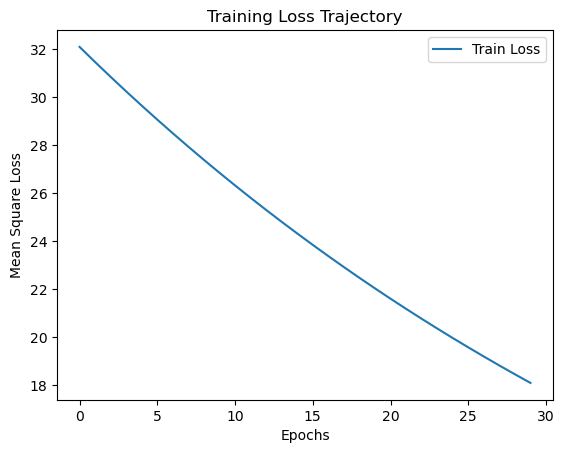

In [22]:
class Loss:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x, theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient
        
    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    def cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        return gradient


    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.loss_obj = Loss(x, y)

    def mean_square_hessian(self):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def newtons_method(self, theta, lr=0.01, epochs=50, loss_trajectory=None):
       
        for epoch in range(epochs):
            # Compute gradient and Hessian for Mean Square Loss
            gradient = self.loss_obj.mean_square_gradient(theta)
            hessian = self.mean_square_hessian()

            inv_hessian = np.linalg.inv(hessian)
            theta -= lr * np.dot(inv_hessian, gradient)

            # Calculate loss for monitoring
            loss = self.loss_obj.mean_square_loss(theta)
            loss_trajectory.append(loss)
           # print(f"Epoch {epoch + 1}, Mean Square Loss: {loss}")

        return theta


class LinearRegression:
    def __init__(self):
        self.theta = None  # Model parameters (coefficients)
        self.train_loss_trajectory = []

    def fit(self, x, y, lr=0.01, epochs=50):
        self.theta = np.zeros(x.shape[1])  # Initialize coefficients (theta)

        # Use the Optimization class to minimize Mean Square Loss
        optimizer = Optimization(x, y)
        self.theta = optimizer.newtons_method(self.theta, lr=lr, epochs=epochs, loss_trajectory=self.train_loss_trajectory)
        return self.theta

    def predict(self, x):
        return np.dot(x, self.theta)


if __name__ == "__main__":
    
    model = LinearRegression()
    model.fit(Xtrainnn, Ytrain, lr=0.01, epochs=30)


    # Plot training loss trajectory
    plt.plot(model.train_loss_trajectory, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Square Loss')
    plt.legend()
    plt.title("Training Loss Trajectory")
    plt.show()


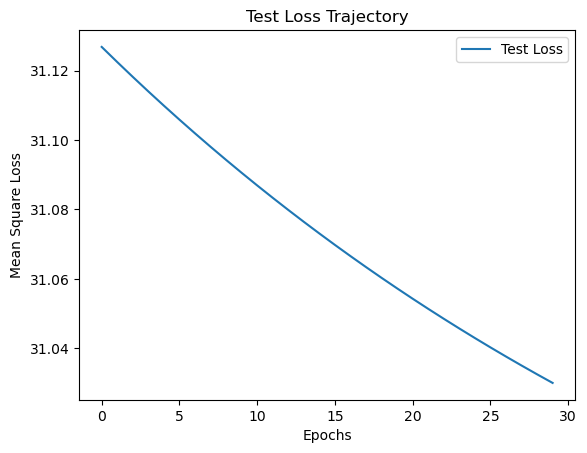

In [192]:
model1 = LinearRegression()
model1.fit(Xtestss, Ytests, lr=0.01, epochs=30)

#predictions = model.predict(Xtests)

# Plot training loss trajectory
plt.plot(model1.train_loss_trajectory, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Loss')
plt.legend()
plt.title("Test Loss Trajectory")
plt.show()

In [ ]:

# def mean_square_loss(x, y, b, c):
#     # Predictions
#     predictions = np.dot(x, b) + c
#     # Mean Square Loss
#     return np.mean((y - predictions) ** 2)

# def mean_square_gradient(x, y, b, c):
#     # Predictions
#     predictions = np.dot(x, b) + c
#     # Gradient w.r.t. β
#     gradient_b = -2 * np.dot(x.T, (y - predictions)) / len(y)
#     # Gradient w.r.t. intercept c
#     gradient_c = -2 * np.sum(y - predictions) / len(y)
#     return gradient_b, gradient_c

# def mean_square_hessian(x):
#     # 2nd order derivative
#     return 2 * np.dot(x.T, x) / len(x)

# def newton_method(x, y, lr=0.01, epochs=50, c=-0.5):
    
#     # Initialize parameters
#     b = np.zeros(x.shape[1]) # Initial values for β
#     train_loss_trajectory = []

#     for epoch in range(epochs):
#         # Step 1: Compute gradients
#         gradient_b, gradient_c = mean_square_gradient(x, y, b, c)

#         # Step 2: Compute Hessian matrix
#         H_b = mean_square_hessian(x)

#         # Step 3: Update parameters
#         inv_hessian = np.linalg.inv(H_b)
#         b -= lr * np.dot(inv_hessian, gradient_b)
#         c -= lr * gradient_c

#         # Compute Mean Square Loss
#         ell = mean_square_loss(x, y, b, c)
#         train_loss_trajectory.append(ell)

#         #print(f"Epoch {epoch+1}, Mean Square Loss: {ell}")

#     return b, c, ell

# # def predict(x,b,c):
# #     return np.dot(np.dot(x, b) + c) 

# if __name__ == "__main__":
   
#     x = np.array(x_train)  # Feature matrix
#     y = np.array(y_train)  # Labels

#     b, c, ell = newton_method(x, y)
#     print(f"Final Results: β = {b}")
#     print(f"Final Results: c = {c}")
#     print(f"Final Mean Square Loss: {ell}")

#     #predictions = predict(x_train,b,c)
#     plt.plot(train_loss_trajectory, label='Train Loss')
#    # plt.plot(x_train, predictions, color='red', label='Predictions')



### c.) Cross Entropy Loss and Newton's Method

In [211]:
df1 = pd.read_csv('logistic.csv')
df1.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [260]:

#One hot encoding
df1['Y'] = df1['Y'].map({'M':'0', 'B':'1'}) 
df1['Y'].astype(float)

train_data, test_data = train_test_split(df1)

Xtrain = train_data.drop('Y', axis=1)
Ytrain = train_data['Y'].astype(float)
Xtrainn = (Xtrain - Xtrain.mean())/Xtrain.std()


Xtests = test_data.drop('Y', axis=1)
Ytests = test_data['Y'].astype(float)
Xtestss = (Xtests - Xtests.mean())/Xtests.std()

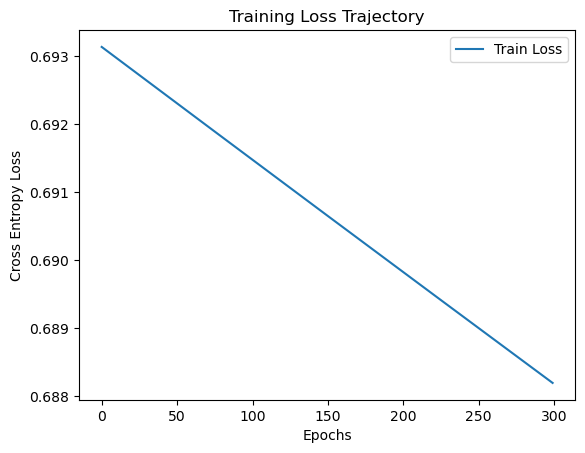

In [289]:
class Loss:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x, theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient
        
    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    def cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        return gradient


    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.loss_obj = Loss(x, y)

    def mean_square_hessian(self):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def cross_entropy_hessian(self,theta):
        p = self.sigmoid(np.dot(self.x, theta))
        W = np.diag((p*(1-p))) 
    
        hess = np.dot((np.dot(self.x.T,W)),self.x)   
    
        return hess

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def newtons_method(self, theta, lr=0.01, epochs=50, loss_trajectory=None):
       
        for epoch in range(epochs):
            # Compute gradient and Hessian for Mean Square Loss
            gradient = self.loss_obj.cross_entropy_gradient(theta)
            hessian = self.cross_entropy_hessian(theta)

            inv_hessian = np.linalg.inv(hessian)
            theta -= lr * np.dot(inv_hessian, gradient)

            # Calculate loss for monitoring
            loss = self.loss_obj.cross_entropy_loss(theta)
            loss_trajectory.append(loss)
            #print(f"Epoch {epoch + 1}, Mean Square Loss: {loss}")

        return theta


class LinearRegression:
    def __init__(self):
        self.theta = None  # Model parameters (coefficients)
        self.train_loss_trajectory = []

    def fit(self, x, y, lr=0.01, epochs=200):
        self.theta = np.zeros(x.shape[1])  # Initialize coefficients (theta)

        # Use the Optimization class to minimize Mean Square Loss
        optimizer = Optimization(x, y)
        self.theta = optimizer.newtons_method(self.theta, lr=lr, epochs=epochs, loss_trajectory=self.train_loss_trajectory)
        return self.theta

    def predict(self, x):
        return np.dot(x, self.theta)
        
    def predict2(self, x):
        z = np.dot(x, self.theta)
        return 1 / (1 + np.exp(-z))


if __name__ == "__main__":
    
    model2 = LinearRegression()
    model2.fit(Xtrainn, Ytrain, lr=0.01, epochs=300)

    # Make predictions on test set
    #predictions = model2.predict2(Xtests)

    # Plot training loss trajectory
    plt.plot(model2.train_loss_trajectory, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.title("Training Loss Trajectory")
    plt.show()


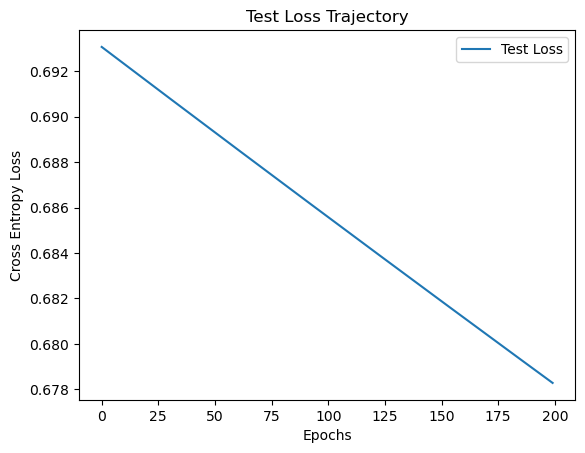

In [276]:

    # Making predictions
predictions = model2.predict2(Xtests)

    # Plotting the testing loss
plt.plot(model3.train_loss_trajectory, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.title("Test Loss Trajectory")
plt.show()


In [283]:
from sklearn.metrics import classification_report

threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)
print("Logistic Regression Classification Report:")
print(classification_report(Ytests, binary_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.77      1.00      0.87        88

    accuracy                           0.77       114
   macro avg       0.39      0.50      0.44       114
weighted avg       0.60      0.77      0.67       114



C:\Users\tegbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tegbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tegbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Suppose model A and model B both have the same accuracy, but model B has a higher
F-score. Which model would be more suited?


Given that both models have the same accuracy but Model B has a higher F-score, Model B would be more suited for scenarios where positive class identification is crucial. It indicates that Model B has better predictive performance in terms of both precision and recall compared to Model A, making it the preferable choice in many practical applications, especially in contexts where false negatives are costly.

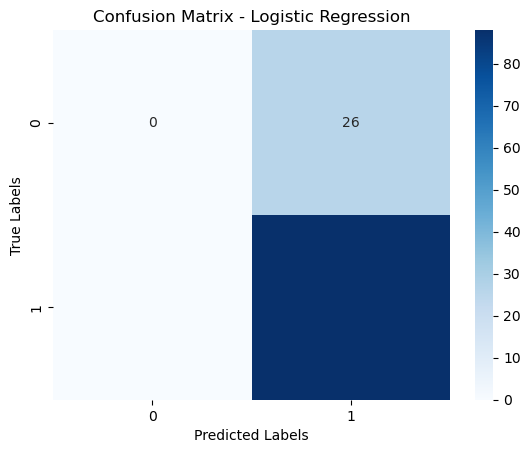

In [284]:
cm_lr = confusion_matrix(Ytests, binary_predictions)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [145]:
# def log_likelihood(x, y, beta):
#     z = np.dot(x, beta)
#     log = np.sum( y*z - np.log(1 + np.exp(z)) )
#     return log

# def gradient_ascent(X, h, y):
#     return np.dot(X.T, y - h)

# def logistic_function(X, beta):
#     z = x_train.dot(beta)
#     return 1 / (1 + np.exp(-z))   

# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def newton(beta0, y, X, lr):
    
#     p = np.array(sigmoid(X.dot(beta0[:,0]))).T  
#     W = np.diag((p*(1-p))) 
    
    
#     hess = np.dot((np.dot(X.T,W)),X)  
#     grad = (np.transpose(X)).dot(y-p)  
     
    
#     s =lr*(np.dot(np.linalg.inv(hess), grad))      
#     beta = beta0 + s
    
#     return beta

# logloss = lambda y,ypred: np.mean((y*np.log(ypred)+(1-y)*np.log(1-ypred)))
# cost = lambda y,ypred: np.mean((y - ypred)**2)

### Decision Boundary

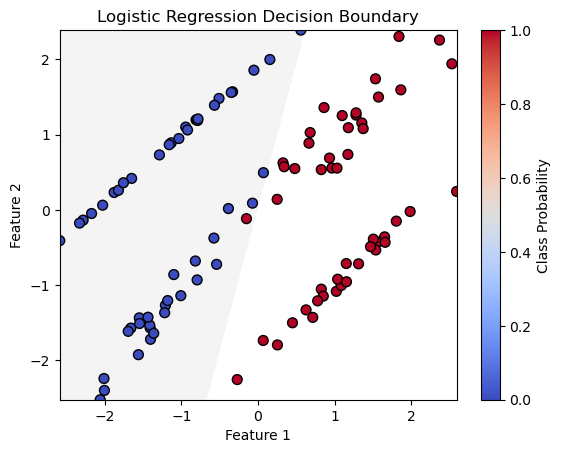

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Define the number of features, informative, redundant, and repeated features
n_features = 2
n_informative = 2
n_redundant = 0
n_repeated = 0

# Generate a synthetic dataset with valid parameters
X, y = make_classification(n_samples=100, 
                            n_features=n_features, 
                            n_informative=n_informative, 
                            n_redundant=n_redundant, 
                            n_repeated=n_repeated, 
                            n_classes=2, 
                            random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Compute the decision function (probability of the positive class)
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap="coolwarm", alpha=0.3)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k', s=50)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Probability')
plt.show()


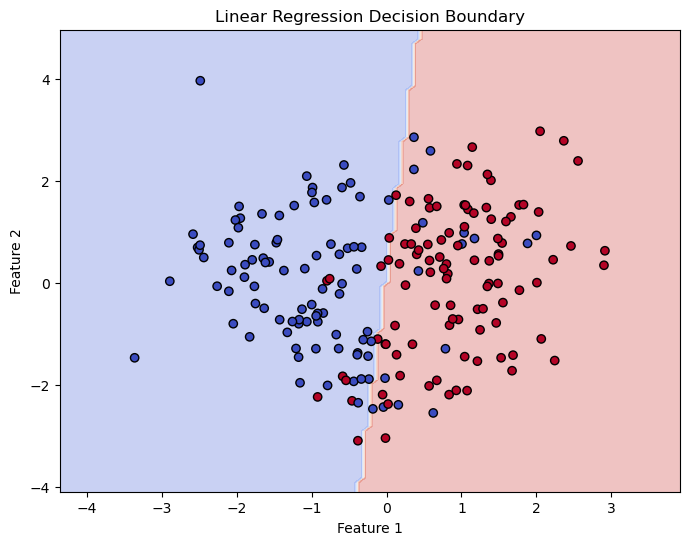

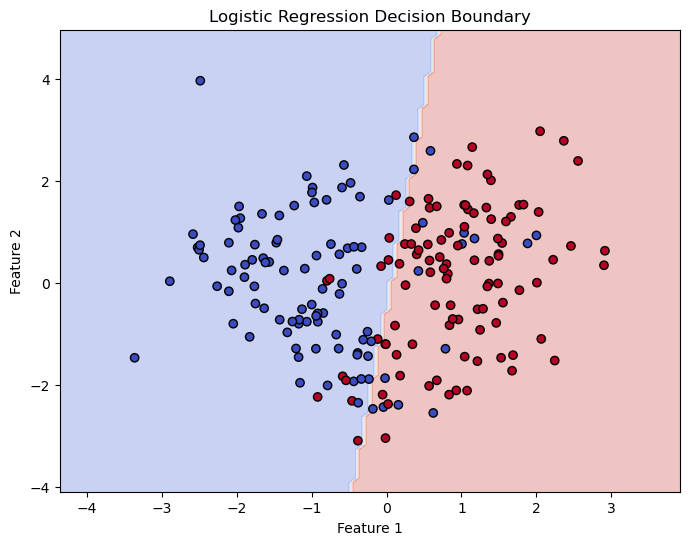

In [2]:
## deciosion boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Convert labels from {0,1} to {-1,1} for linear regression decision boundary
y_linear = 2 * y - 1

# Implement Linear Regression for Decision Boundary
class LinearRegressionDecisionBoundary:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return np.sign(X_b.dot(self.coefficients))

# Train Linear Regression Model
linear_model = LinearRegressionDecisionBoundary()
linear_model.fit(X, y_linear)

# Implement Logistic Regression for Decision Boundary
class LogisticRegressionDecisionBoundary:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.coefficients = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.coefficients = np.zeros(X_b.shape[1])

        for _ in range(self.epochs):
            predictions = self.sigmoid(X_b.dot(self.coefficients))
            gradient = X_b.T.dot(predictions - y) / X.shape[0]
            self.coefficients -= self.lr * gradient

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return (self.sigmoid(X_b.dot(self.coefficients)) >= 0.5).astype(int)

# Train Logistic Regression Model
logistic_model = LogisticRegressionDecisionBoundary()
logistic_model.fit(X, y)

# Plot Decision Boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict across the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_model, X, y, "Linear Regression Decision Boundary")
plot_decision_boundary(logistic_model, X, y, "Logistic Regression Decision Boundary")


In [ ]:
### Gradient de

import numpy as np

# Given dataset
x = np.array([1, 2, 4])
y = np.array([1, 3, 3])

# Initial parameters
beta = np.array([1.0, 0.0])  # beta[0] = beta_0 (bias), beta[1] = beta_1 (weight)
learning_rate = 0.01

# Function to compute the RSS and its gradient
def compute_rss_and_gradient(beta, x, y):
    # Predicted values
    y_pred = beta[0] + beta[1] * x

    
    # Residuals
    residuals = y - y_pred
    
    # RSS
    rss = np.sum(residuals**2)
    
    # Gradients
    gradient_beta_0 = -2 * np.sum(residuals)
    gradient_beta_1 = -2 * np.sum(residuals * x)
    
    return rss, np.array([gradient_beta_0, gradient_beta_1])

# Perform 2 steps of gradient descent
for t in range(2):  # 2 iterations
    rss, gradients = compute_rss_and_gradient(beta, x, y)
    
    # Update parameters
    beta = beta - learning_rate * gradients
    
    # Output the results for each iteration
    print(f"Iteration {t + 1}:")
    print(f"  RSS: {rss}")
    print(f"  Parameters: beta_0 = {beta[0]}, beta_1 = {beta[1]}")

# Final parameters after 2 steps
print("\nFinal Parameters after 2 steps:")
print(f"beta_0 = {beta[0]}, beta_1 = {beta[1]}")


In [ ]:
### LOGISTIC REGRESSION , Binary classification, Log likelihood

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
     
def gradient_descent(x, y, lr=0.01, epochs=600,c = -0.5):
    b = np.array([1.0, 0.0]) 
    loss = y*(np.dot(x,b) )
    
    # Perform gradient descent
    for epoch in range(epochs):
        z = np.dot(x,b) + c
        p = sigmoid(z)
        
        #print(p)# Predicted y values
        eta = np.dot(x.T, (y-p))
        c_ = np.sum(y - p)
        
        b += lr * eta
        c += lr * c_
        
        ell = -np.sum(y * np.dot(x, b) - np.log(1 + np.exp(np.dot(x, b) + c)))
        print(ell)

    return b,c,ell

if __name__ == "__main__":

    x = np.array([[-1, 1], [1, -1], [0, 1]])
    y = np.array([1,1,0])

    b,c, ell = gradient_descent(x, y)

    print(f"Final Results: m={b}")
    print(f"Final Results: c={c}")
    print(ell)

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def newton_method(x, y, lr=1.0, epochs=5, c=-0.5):
    # Initialize parameters
    b = np.array([1.0, 0.0])  # Initial values for β
    loss = y * (np.dot(x, b))
    
    # Perform one iteration of Newton's method
    for epoch in range(epochs):
        # Step 1: Calculate z and p (predicted probabilities)
        z = np.dot(x, b) + c
        p = sigmoid(z)  # Predicted probabilities

        # Step 2: Calculate gradients
        gradient_b = np.dot(x.T, (y - p))  # Gradient w.r.t. β
        gradient_c = np.sum(y - p) # Gradient w.r.t. intercept c

       
        # Step 3: Calculate Hessian matrix
        W = np.diag(p * (1 - p))  # Diagonal matrix with p_i * (1 - p_i)
        H_b = np.dot(x.T, np.dot(W, x))  # Hessian matrix for β

    
       # H_c = np.sum(W)                  # Sum of W diagonal elements for intercept
        inv = np.linalg.inv(H_b)
        hh = np.dot(inv,gradient_b)
        b += lr * hh
        c += lr + gradient_c

        # Compute log-likelihood loss
        ell = -np.sum(y * np.dot(x, b) - np.log(1 + np.exp(np.dot(x, b) + c)))
        #print(f"Epoch {epoch+1}, Log-likelihood: {ell}")

    return b, c, ell

if __name__ == "__main__":
    x = np.array([[-1, 1], [1, -1], [0, 1]])
    y = np.array([1, 1, 0])

    b,c, ell = newton_method(x, y)
    print(f"Final Results: β = {b}")
    print(f"Final Results: β = {c}")
    print(f"Final Log-likelihood: {ell}")


In [ ]:
def derivative_function(x):
    return 4 * x**3 - 3.9 * x**2 - 3.9 * x + 4

def objective_function(x):
    return x**4 - 1.3*x**3 - 1.95*x**2 + 4*x +3.65

def gradient_descent (step_length, x0):
    iterations = 1
    xi = x0
    derivative_value = derivative_function(xi)
    next_xi = xi - step_length * derivative_value
    print("iterations: " + str(iterations) + " - xi: " + str(xi) + " - next_xi: " + str(next_xi) + " - objective_function(next_xi): " + str(objective_function(next_xi)))
    
    while objective_function(next_xi) >= 10**(-6):
        iterations = iterations + 1
        xi = next_xi
        next_xi = xi - step_length * derivative_function(xi)
        print("iterations: " + str(iterations) + " - xi: " + str(xi) + " - next_xi: " + str(next_xi) + " - objective_function(next_xi): " + str(objective_function(next_xi)))
    return xi, iterations

In [ ]:
x0 = 2
step_length = 0.1
xi, iterations = gradient_descent(step_length, x0)
print("xi: " + str(xi) + ", iterations: " + str(iterations))

In [ ]:
def backtracking_line_search(x, alpha, beta):
    miu=1

    while objective_function(x-miu*derivative_function(x)) > objective_function(x) - alpha*miu*derivative_function(x)**2:
        miu = beta * miu
        
    return miu

def gradient_descent_step_size_included(x0, alpha, beta):
    xi = x0
    derivative_value = derivative_function(xi)
    step_length = backtracking_line_search(xi, alpha, beta)
    next_xi = xi - step_length * derivative_value
    iterations = 0
    while objective_function(next_xi) >= 10**(-6):
        xi = next_xi
        derivative_value = derivative_function(xi)
        step_length = backtracking_line_search(xi, alpha, beta)
        next_xi = xi - step_length * derivative_value
        iterations = iterations + 1
    return xi, iterations

In [ ]:
# Step 3: Initialize and train a Linear Regression model, and evaluate its performance using R-squared
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_r2 = linear_model.score(X_test, y_test)
print("Linear Regression R-squared:", linear_r2)

# Step 4: Initialize and train a Lasso Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
lasso_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_r2 = lasso_model.score(X_test, y_test)
    print(f"Lasso Regression R-squared (alpha={alpha}):", lasso_r2)

# Step 5: Initialize and train a Ridge Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
ridge_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_r2 = ridge_model.score(X_test, y_test)
    print(f"Ridge Regression R-squared (alpha={alpha}):", ridge_r2)

In [ ]:
### Task 2: Train a SK Polynomial Regression Model

1. Select the feature (hours) and the target variable (scores) for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets.
4. Create a Linear Regression model and fit it using the transformed training data.
5. Print the model's coefficients and intercept.

In [ ]:
# Step 1: Select the feature and target variable for modeling
X = df[['hours']]
y = df['scores']

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [ ]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Create a Linear Regression model and fit it using the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

# Step 1: Make predictions on the test set using the trained model
y_pred = model.predict(X_test_poly)

# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print the MSE and R2 values
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


In [ ]:
###SKL Classification

# Step 4: Check for any missing values
print("Missing values in the dataset:")
print(df.isna().sum())
# Step 5: Check the distribution of classes in the target variable
print("Distribution of classes in the target variable:")
print(df['class'].value_counts())
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
sns.pairplot(df, vars=["area", "perimeter", "major_axis_length", "minor_axis_length"], hue="class")
plt.show()

# Step 1: Select features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Step 2: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 1: Initialize and train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Step 2: Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))# Step 4: Plot the confusion matrix
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# Step 1: Train a Logistic Regression model with specified parameters
lr_params = {
    'max_iter': 300, 
    'C': 0.5,
    'tol': 0.001,
    'class_weight': 'balanced'
}
lr_model_custom = LogisticRegression(**lr_params)
lr_model_custom.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_custom = lr_model_custom.predict(X_test)

In [ ]:
Converting non-numeric values to numeric values using one-hot encoding of the columns

In [ ]:
cats=['City1','City2','MktLeadArLn','LowPriceArLn']
airq[cats] = airq[cats].astype('category')

airq_enc = airq.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
airq_enc.dtypes

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(airq_enc.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

So according to the above correlation heatmap AvgFare, Distance and AvgFareLead is closely related to the price.So other columns can be dropped because they are not closely correlated to price
So now we choose the selected features in Xdata and price in Ydata then split the dataset into 80% train set and 20% test set.

In [ ]:
Ydata = airq_enc['Price'] 
Xdata = airq_enc[['AvgFare','Distance','AvgFareLead']]
Xdata = (Xdata - Xdata.mean())/Xdata.std()

x_train_airq, x_test_airq, y_train_airq, y_test_airq =train_test_split(Xdata, 
                                                                       Ydata,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)
y_train_airq=y_train_airq.values.reshape(-1,1)
y_test_airq=y_test_airq.values.reshape(-1,1)

### The solution to make the dataset balanced is using stratified sampling.Stratified sampling is a sampling method where the researcher divides the population into separate groups which is called strata then a probability sample is drawn from each group.

In [ ]:
def stratify_sample(df, col, samples):
    n = min(samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [ ]:
tictactoe_stratified=stratify_sample(tictactoe, 'Class', 1000)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 5: Encode the categorical variable 'smoking_status' by converting 'Yes' to 1 and 'No' to 0.
df['smoking_status'] = df['smoking_status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 1: Select the features and target variable for modeling
X = df.drop(['health_risk_score'], axis=1)
y = df['health_risk_score']

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Initialize and train a Linear Regression model, and evaluate its performance using R-squared
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_r2 = linear_model.score(X_test, y_test)
print("Linear Regression R-squared:", linear_r2)

# Step 4: Initialize and train a Lasso Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
lasso_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_r2 = lasso_model.score(X_test, y_test)
    print(f"Lasso Regression R-squared (alpha={alpha}):", lasso_r2)


# Step 5: Initialize and train a Ridge Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
ridge_alphas = [0.01, 0.1, 1.0, 10.0]
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_r2 = ridge_model.score(X_test, y_test)
    print(f"Ridge Regression R-squared (alpha={alpha}):", ridge_r2)













from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df.drop(["target"], axis=1)
y = df["target"]
X.head(3)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


lasso_model = Lasso(alpha=1.0)  # Adjust alpha for Lasso
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)












import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more features and very high noise
X, y, coef = make_regression(n_samples=200, n_features=50, noise=10.0, coef=True, random_state=42)
noise = np.random.randn(200, 100)  # Substantially more noise features
X = np.hstack([X, noise])  # Add noise features

# Introduce stronger multicollinearity
for i in range(50, 75):  # Create strong multicollinearity in 25 features
    X[:, i] = X[:, i - 50] + np.random.normal(0, 0.2, 200)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)  # Adjust alpha for Lasso
ridge_model = Ridge(alpha=0.01)  # Adjust alpha for Ridge

# Fit the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R^2 scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Lasso Regression: {r2_lasso}")
print(f"R^2 Score for Ridge Regression: {r2_ridge}")

# Plotting the coefficients for comparison
plt.figure(figsize=(12, 8))
plt.plot(range(len(linear_model.coef_)), linear_model.coef_, label='Linear Regression', marker='o')
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, label='Lasso Regression', marker='o')
plt.plot(range(len(ridge_model.coef_)), ridge_model.coef_, label='Ridge Regression', marker='o')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Comparison of Coefficient Magnitudes')
plt.legend()
plt.show()






from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # You can adjust the degree based on model performance
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()








import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("car_ownership.csv")
df.head(3)
# Separate the features and the target variable
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
y_pred
y_test.tolist()








import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv("social_network_ads.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

# Step 4: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())

# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['estimated_salary'], c=df['purchased'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')
plt.colorbar(label='Purchased')
plt.show()

# Step 1: Encode the gender column (Male as 0 and Female as 1)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Step 2: Select the features and target variable for modeling
X = df[['age', 'estimated_salary', 'gender']]
y = df['purchased']

# Step 3: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train a Logistic Regression model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

# Step 1: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


### classification report


def classification_report_simple(y_true, y_pred):
    # Get unique classes from true and predicted labels
    classes = sorted(set(y_true) | set(y_pred))
    report = {}

    for c in classes:
        # Count True Positives, False Positives, and False Negatives for class c
        tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == c and yp == c)
        fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt != c and yp == c)
        fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == c and yp != c)
        support = sum(1 for yt in y_true if yt == c)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        report[c] = (precision, recall, f1, support)
    return report

def print_report(report):
    print(f"{'Class':<10}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}{'Support':>10}")
    for cls, (precision, recall, f1, support) in report.items():
        print(f"{cls:<10}{precision*100:10.2f}{recall*100:10.2f}{f1*100:10.2f}{support:10d}")

# Example usage
if __name__ == "__main__":
    y_true = [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
    y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
    
    report = classification_report_simple(y_true, y_pred)
    print_report(report)


